```bash
!pip install dataset
!pip install ragas
!pip install langchain
!pip install langchain_community



## 1. Prepare Dataset

In [2]:
from datasets import load_dataset

# loading the dataset ragas provided(from explodinggradients repo)
amnesty_qa = load_dataset("explodinggradients/amnesty_qa", "english_v2")


c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\kuotz\anaconda3\envs\langchian2\lib\site-packages\datasets\load.py:1454: FutureWarning: The repository for explodinggradients/amnesty_qa contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/explodinggradients/amnesty_qa
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


In [3]:
amnesty_subset = amnesty_qa["eval"].select(range(2))

In [4]:
amnesty_subset.to_pandas()

,question,ground_truth,answer,contexts
0,What are the global implications of the USA Su...,The global implications of the USA Supreme Cou...,The global implications of the USA Supreme Cou...,"[- In 2022, the USA Supreme Court handed down ..."
1,Which companies are the main contributors to G...,"According to the Carbon Majors database, the m...","According to the Carbon Majors database, the m...","[In recent years, there has been increasing pr..."


## 2. Initialize model

In [6]:
#only test single metric as of now since it is slow
from ragas.metrics import (
    faithfulness,
)

In [7]:
from langchain_community.chat_models import ChatOllama
from ragas import evaluate
from langchain_community.embeddings import OllamaEmbeddings
# information found here: https://docs.ragas.io/en/latest/howtos/customisations/bring-your-own-llm-or-embs.html


In [9]:
langchain_llm = ChatOllama(model="llama3.1:8b")
langchain_embeddings = OllamaEmbeddings(model="llama3.1:8b")


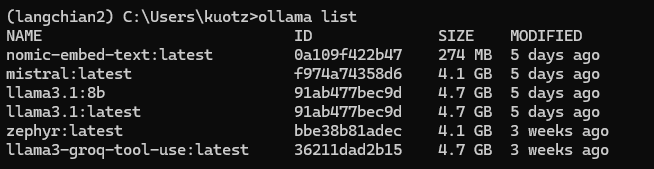

## 3. Evaluate

In [10]:
result = evaluate(amnesty_subset,
                  metrics=[
        faithfulness,
        ], 
        llm=langchain_llm,embeddings=langchain_embeddings)

Evaluating:   0%|          | 0/2 [00:00<?, ?it/s]

In [1]:
result

NameError: name 'result' is not defined